In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

# Helper function to plot a gallery of portraits
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



In [2]:

# Load images from dataset
dir_name = "dataset/faces/"

In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/faces/
   creating: dataset/faces/Aamir/
  inflating: dataset/faces/Aamir/face_101.jpg  
  inflating: dataset/faces/Aamir/face_102.jpg  
  inflating: dataset/faces/Aamir/face_106.jpg  
  inflating: dataset/faces/Aamir/face_107.jpg  
  inflating: dataset/faces/Aamir/face_114.jpg  
  inflating: dataset/faces/Aamir/face_115.jpg  
  inflating: dataset/faces/Aamir/face_117.jpg  
  inflating: dataset/faces/Aamir/face_118.jpg  
  inflating: dataset/faces/Aamir/face_119.jpg  
  inflating: dataset/faces/Aamir/face_123.jpg  
  inflating: dataset/faces/Aamir/face_125.jpg  
  inflating: dataset/faces/Aamir/face_127.jpg  
  inflating: dataset/faces/Aamir/face_13.jpg  
  inflating: dataset/faces/Aamir/face_17.jpg  
  inflating: dataset/faces/Aamir/face_20.jpg  
  inflating: dataset/faces/Aamir/face_21.jpg  
  inflating: dataset/faces/Aamir/face_25.jpg  
  inflating: dataset/faces/Aamir/face_27.jpg  
  inflating: dataset/faces/Aamir/face_35.jpg  
  inflating

In [4]:
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
        target_names.append(person_name)
    person_id += 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)

n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


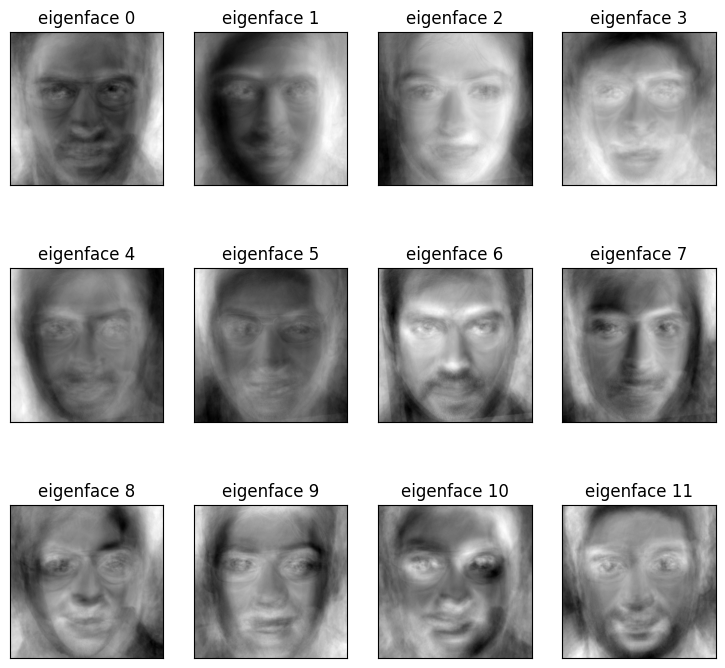

(337, 150) (113, 150)
Projection done...


In [5]:
# Split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset
n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# Compute Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Projection done...")




In [6]:
# Training MLP Classifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)



Iteration 1, loss = 2.80834842
Iteration 2, loss = 2.76559489
Iteration 3, loss = 2.72436223
Iteration 4, loss = 2.68411981
Iteration 5, loss = 2.64552909
Iteration 6, loss = 2.60768968
Iteration 7, loss = 2.57137889
Iteration 8, loss = 2.53535363
Iteration 9, loss = 2.50103347
Iteration 10, loss = 2.46775776
Iteration 11, loss = 2.43577873
Iteration 12, loss = 2.40390969
Iteration 13, loss = 2.37330670
Iteration 14, loss = 2.34365743
Iteration 15, loss = 2.31405826
Iteration 16, loss = 2.28568721
Iteration 17, loss = 2.25830972
Iteration 18, loss = 2.23133880
Iteration 19, loss = 2.20488029
Iteration 20, loss = 2.17917343
Iteration 21, loss = 2.15505249
Iteration 22, loss = 2.12974443
Iteration 23, loss = 2.10611278
Iteration 24, loss = 2.08294449
Iteration 25, loss = 2.05995105
Iteration 26, loss = 2.03764191
Iteration 27, loss = 2.01527427
Iteration 28, loss = 1.99356528
Iteration 29, loss = 1.97166390
Iteration 30, loss = 1.94997755
Iteration 31, loss = 1.92928183
Iteration 32, los

Accuracy: 69.91150442477876


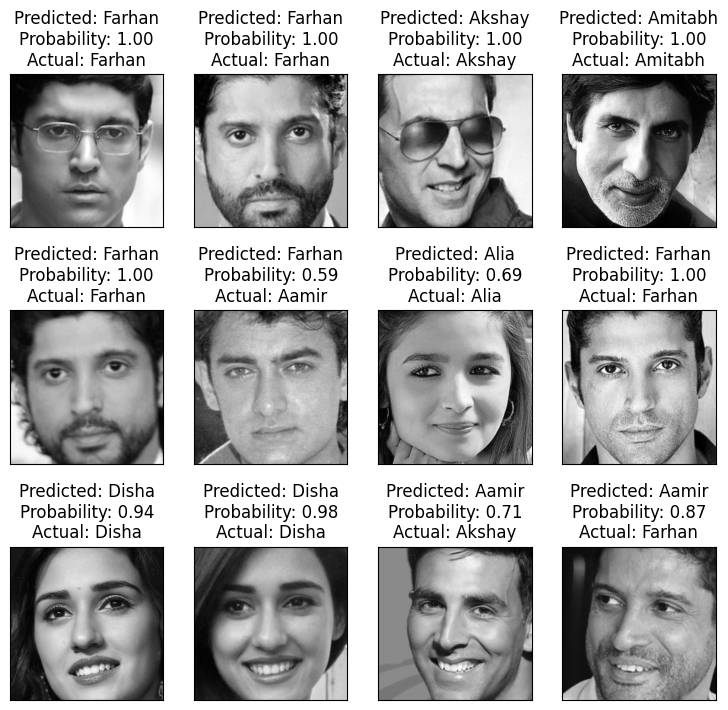

In [7]:
# Prediction
y_pred = clf.predict(X_test_lda)
y_prob = clf.predict_proba(X_test_lda)

# Calculating Accuracy
true_positive = np.sum(y_pred == y_test)
accuracy = true_positive * 100 / y_pred.shape[0]
print("Accuracy:", accuracy)

# Plotting results
prediction_titles = ["Predicted: %s\nProbability: %.2f\nActual: %s" % (class_names[pred_id], prob, class_names[actual_id]) for pred_id, prob, actual_id in zip(y_pred, np.max(y_prob, axis=1), y_test)]
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 450
Extracting the top 150 eigenfaces from 337 faces


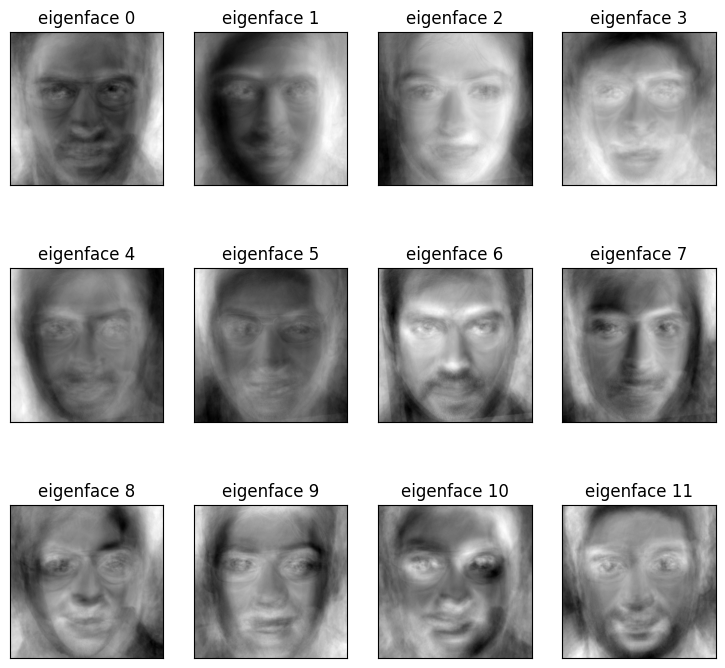

(337, 150) (113, 150)
Projection done...
Iteration 1, loss = 2.36734014
Iteration 2, loss = 2.19604524
Iteration 3, loss = 2.03092559
Iteration 4, loss = 1.87449366
Iteration 5, loss = 1.72647092
Iteration 6, loss = 1.58837370
Iteration 7, loss = 1.45767321
Iteration 8, loss = 1.33702165
Iteration 9, loss = 1.22589792
Iteration 10, loss = 1.12464964
Iteration 11, loss = 1.03026121
Iteration 12, loss = 0.94741480
Iteration 13, loss = 0.87111613
Iteration 14, loss = 0.80321383
Iteration 15, loss = 0.74229884
Iteration 16, loss = 0.68560064
Iteration 17, loss = 0.63587381
Iteration 18, loss = 0.59084145
Iteration 19, loss = 0.54978029
Iteration 20, loss = 0.51280614
Iteration 21, loss = 0.47935981
Iteration 22, loss = 0.44868252
Iteration 23, loss = 0.42149150
Iteration 24, loss = 0.39607029
Iteration 25, loss = 0.37310506
Iteration 26, loss = 0.35237207
Iteration 27, loss = 0.33345512
Iteration 28, loss = 0.31616815
Iteration 29, loss = 0.30020832
Iteration 30, loss = 0.28558688
Iteratio

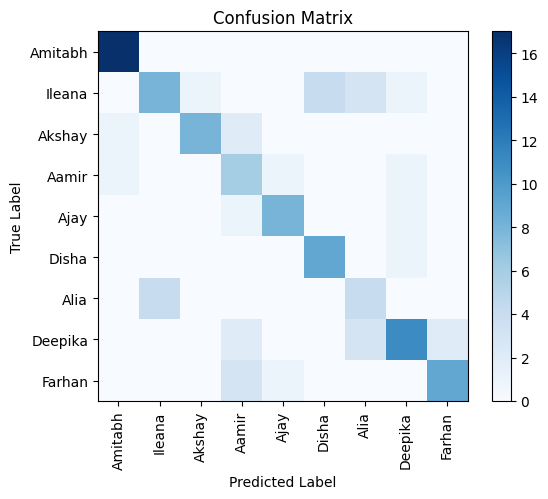

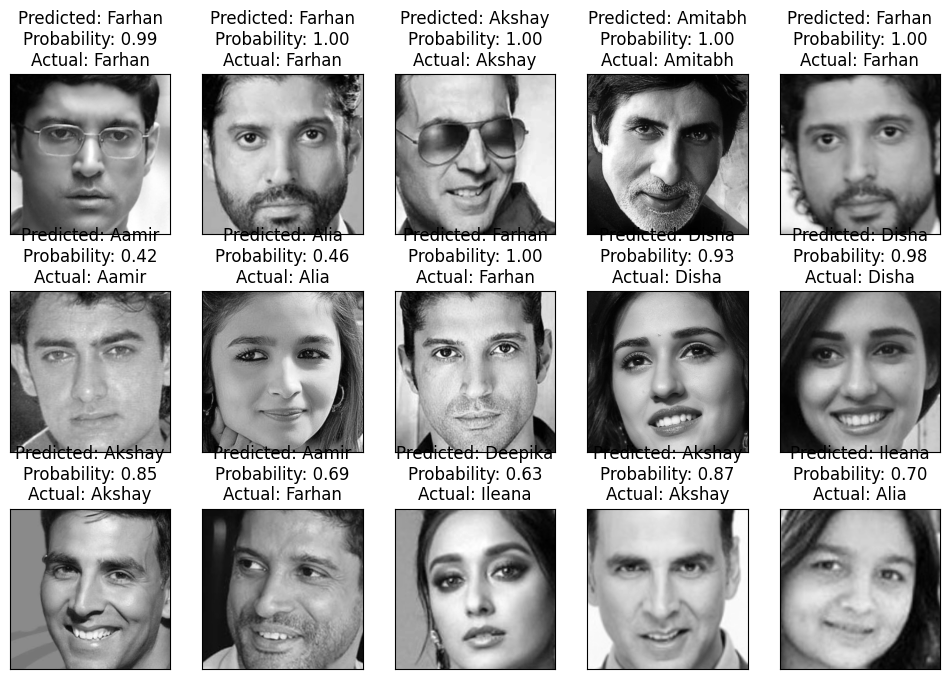

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import os
import cv2

# Helper function to plot a gallery of portraits
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Load images from dataset
dir_name = "dataset/faces/"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
        target_names.append(person_name)
    person_id += 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)

n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Compute a PCA (eigenfaces) on the face dataset
n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# Projecting the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# Compute Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Projection done...")

# Training MLP Classifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(100,), max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

# Prediction
y_pred = clf.predict(X_test_lda)
y_prob = clf.predict_proba(X_test_lda)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
plt.yticks(np.arange(len(class_names)), class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting results
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
    ax.set_title('Predicted: {}\nProbability: {:.2f}\nActual: {}'.format(class_names[y_pred[i]], np.max(y_prob[i]), class_names[y_test[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import os
import cv2

# Load images from dataset
dir_name = "dataset/faces/"




In [10]:
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
        target_names.append(person_name)
    person_id += 1

y = np.array(y)
X = np.array(X)

# Split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute PCA
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Compute LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)

# Hyperparameter tuning for MLP classifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000],
}

grid_search = GridSearchCV(MLPClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_lda, y_train)
best_params = grid_search.best_params_




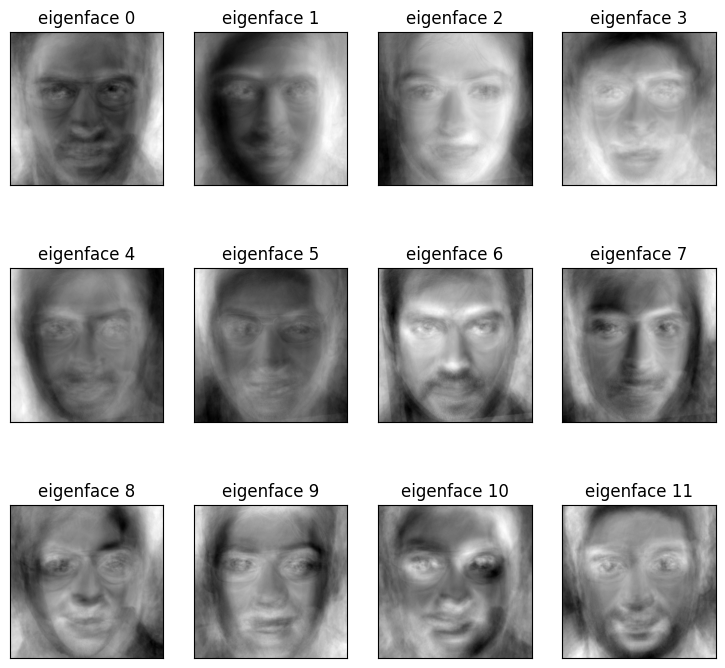

In [11]:
# Compute eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [12]:
# Train MLP Classifier with best parameters
clf = MLPClassifier(random_state=1, **best_params)
clf.fit(X_train_lda, y_train)

MLPClassifier(max_iter=1000, random_state=1, solver='sgd')

Accuracy: 0.7345132743362832


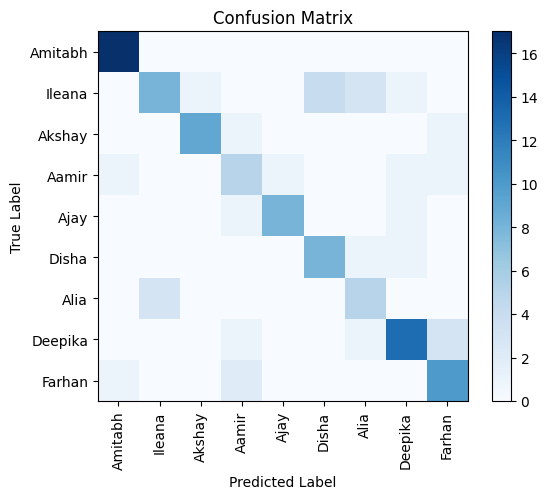

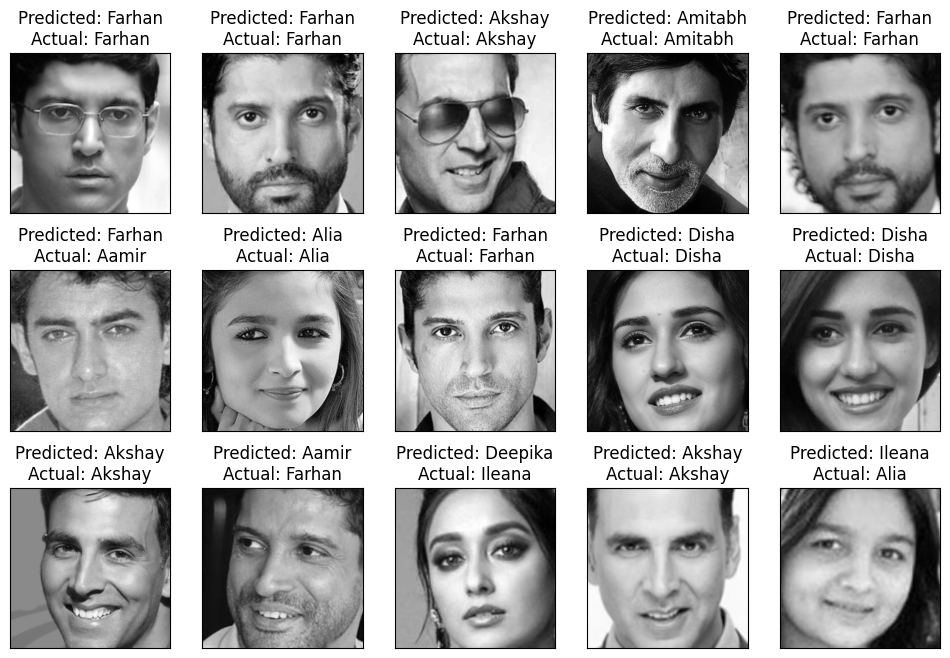

In [13]:
# Prediction
y_pred = clf.predict(X_test_lda)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
plt.yticks(np.arange(len(class_names)), class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting results
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
    ax.set_title('Predicted: {}\nActual: {}'.format(class_names[y_pred[i]], class_names[y_test[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

Accuracy: 0.7256637168141593


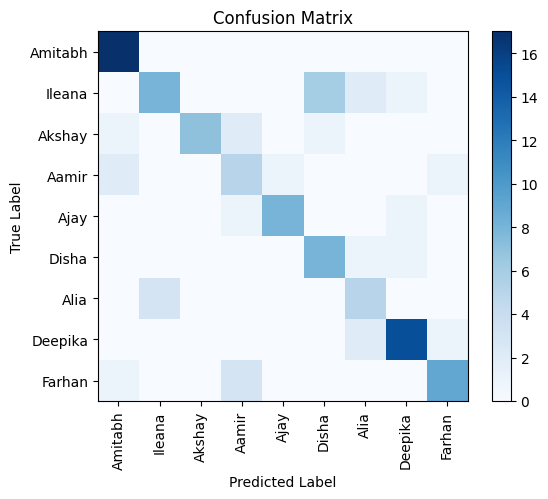

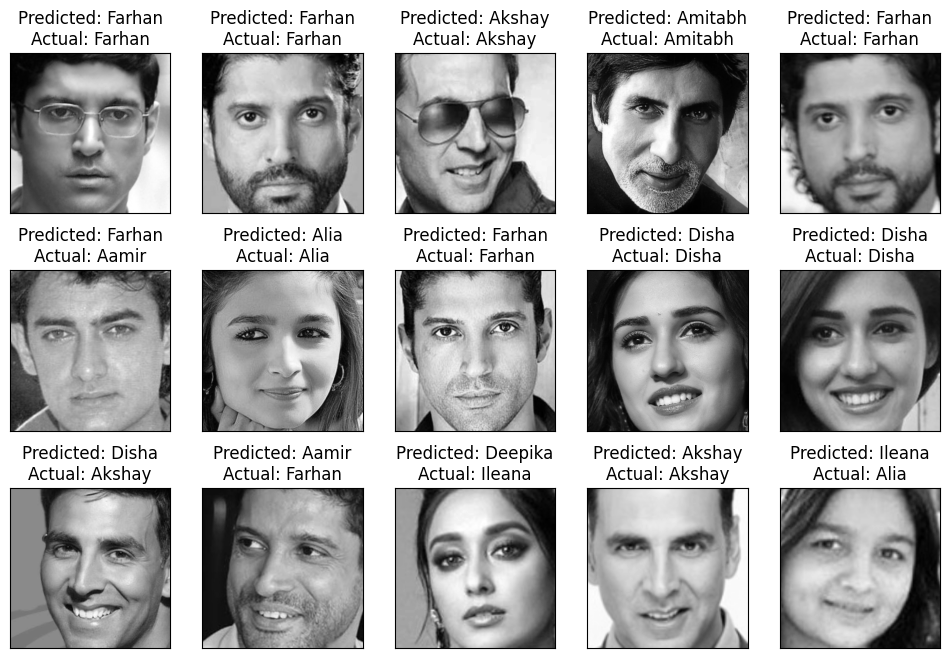

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import os
import cv2

# Load images from dataset
dir_name = "dataset/faces/"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
        target_names.append(person_name)
    person_id += 1

y = np.array(y)
X = np.array(X)

# Split into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute PCA
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Compute LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_pca, y_train)
X_test_lda = lda.transform(X_test_pca)

# Hyperparameter tuning for MLP classifier
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000],
}

grid_search = GridSearchCV(MLPClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_lda, y_train)
best_params = grid_search.best_params_

# Train MLP Classifier with best parameters
clf = MLPClassifier(random_state=1, **best_params)
clf.fit(X_train_lda, y_train)

# Prediction
y_pred = clf.predict(X_test_lda)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=90)
plt.yticks(np.arange(len(class_names)), class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting results
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
    ax.set_title('Predicted: {}\nActual: {}'.format(class_names[y_pred[i]], class_names[y_test[i]]))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


<ipython-input-15-ea228880a571>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(X_test_3d[:, 0], X_test_3d[:, 1], X_test_3d[:, 2], c=y_test, cmap=plt.cm.get_cmap('viridis'), s=50, alpha=0.8)


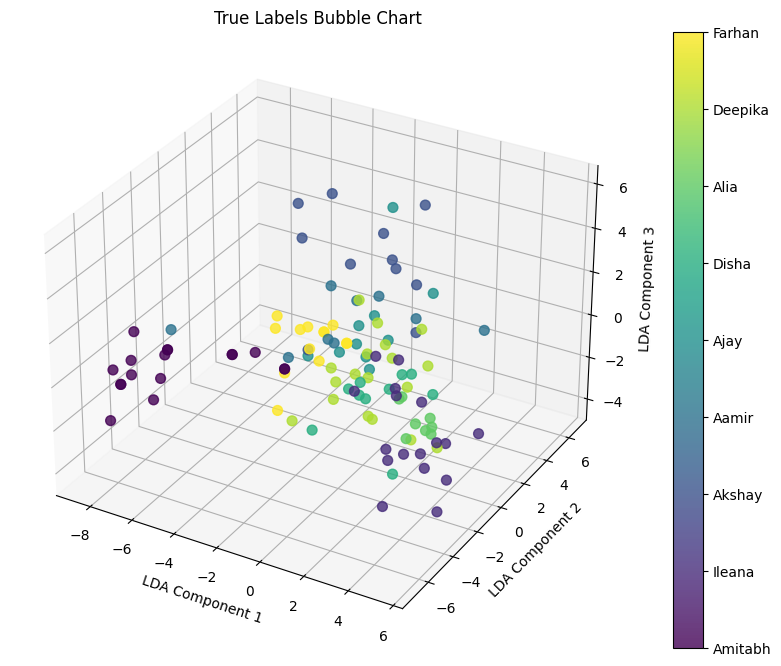

In [15]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D

# Transform data for 3D plot
X_test_3d = lda.transform(X_test_pca)[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot true labels as bubbles
scatter = ax.scatter(X_test_3d[:, 0], X_test_3d[:, 1], X_test_3d[:, 2], c=y_test, cmap=plt.cm.get_cmap('viridis'), s=50, alpha=0.8)

# Add color bar
colorbar = fig.colorbar(scatter, ax=ax)
colorbar.set_ticks(np.arange(len(class_names)))
colorbar.set_ticklabels(class_names)

# Set labels and title
ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')
ax.set_title('True Labels Bubble Chart')

# Show the plot
plt.show()
